# Optimisation: SNES

This example shows you how to run a global optimisation with [SNES](http://pints.readthedocs.io/en/latest/optimisers/snes.html).

For a more elaborate example of an optimisation, see: [basic optimisation example](./first-example.ipynb).

Minimising error measure
using Seperable Natural Evolution Strategy (SNES)
Running in sequential mode.
Iter. Eval. Best      Time m:s
0     6      1032189    0:03.3
1     12     1032189    0:03.3
2     18     1032189    0:03.3
3     24     415890.9   0:03.3
20    126    99951.86   0:03.3
40    246    97790.04   0:03.3
60    366    97712.96   0:03.4
80    486    97712.92   0:03.4
100   606    97712.92   0:03.4
120   726    97712.92   0:03.4
140   846    97712.92   0:03.4
160   966    97712.92   0:03.4
180   1086   97712.92   0:03.5
200   1206   97712.92   0:03.5
220   1326   97712.92   0:03.5
240   1446   97712.92   0:03.5
260   1566   97712.92   0:03.5
280   1686   97712.92   0:03.5
300   1806   97712.92   0:03.6
320   1926   97712.92   0:03.6
340   2046   97712.92   0:03.6
360   2166   97712.92   0:03.6
380   2286   97712.92   0:03.6
381   2286   97712.92   0:03.6
Halting: No significant change for 200 iterations.
Score at true solution: 
97762.3046752
Found solution:          True pa

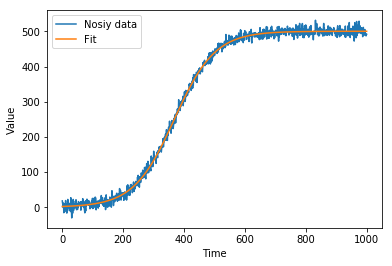

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.RectangularBoundaries([0, 400], [0.03, 600])

# Perform an optimization with boundaries and hints
x0 = 0.01, 450
sigma0 = [0.01, 100]
found_parameters, found_value = pints.optimise(
    score,
    x0,
    sigma0,
    boundaries,
    method=pints.SNES,
)

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
pl.figure()
pl.xlabel('Time')
pl.ylabel('Value')
pl.plot(times, values, label='Nosiy data')
pl.plot(times, problem.evaluate(found_parameters), label='Fit')
pl.legend()
pl.show()